# 1/ Ước lượng doanh số bán hàng cho Tú

## Bước 1: Thuyết phục Tú Website ABC.vn là uy tín

### Data cần thiết:

- Tổng lượng Traffic của Website (ngày/tuần/tháng/quý/năm)
- Số lượt xem trang
- Time on site (thời gian trung bình 1 khách hàng truy cập & xem trên website)
- Bounce rate (tỷ lệ thoát trang)
- Tổng số lượng khách hàng đã đăng ký bán hàng trên trang
- Số lượng khách hàng đăng ký mới theo ngày
- Tổng số khách hàng theo dõi/ mua hàng trong category mỹ phẩm
- Reviews/ Rating Website
- Top 10 người bán có doanh thu cao nhất trong mảng mỹ phẩm

## Bước 2: Ước lượng tổng doanh thu cho Tú

### Thông tin/Data cần thiết:

- Tổng số người bán ngành hàng mỹ phẩm - Tú's Competitors
- Doanh thu trung bình 1 tháng
- Tổng số lượng sản phẩm/SKU
- Đơn giá các SKU
- Ngày người mua đặt hàng, ngày ship hàng, status hàng hóa(khách hàng nhận/ trả lại): các thông tin này sẽ ước lượng được trung bình số hàng bị trả lại trong tháng/ quý/ năm => cân đối được dòng tiền
- Thông tin khuyến mãi trên website
- Budget Tú có để marketing trang bán hàng của bản thân

### Dựa vào những data/ thông tin trên, ta có thể ước lượng được trung bình 1 ngày/ tuần/ tháng / quý / năm Tú bán được bao nhiêu sản phẩm, nhân với giá của từng SKU sẽ ra được total revenue, trừ đi chi phí marketing, discount (tùy vào chiến lược bán hàng của Tú), chi phí vận chuyển ... sẽ ra được profit

# Bài tập 2: phân tích data trên trang ABC.vn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('success')

success


In [2]:
#df = pd.read_csv('C:/Users/quan.nguyen/Desktop/data/data_ecommerce.csv')
df = pd.read_csv('C:/Users/NHQ/Desktop/MindX Test/data/data_ecommerce.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Seller ID               2145 non-null   int64 
 1   Seller's Main Category  2145 non-null   object
 2   Sign-up Time            2145 non-null   object
 3   Activation Time         2145 non-null   object
 4   1st Listing             2145 non-null   object
 5   1st Salable             2145 non-null   object
 6   1st Transaction         2145 non-null   object
dtypes: int64(1), object(6)
memory usage: 117.4+ KB


### Convert object types to datetime

In [4]:
df['Sign-up Time'] = pd.to_datetime(df['Sign-up Time'])
df['Activation Time'] = pd.to_datetime(df['Activation Time'])
df['1st Listing'] = pd.to_datetime(df['1st Listing'])
df['1st Salable'] = pd.to_datetime(df['1st Salable'])
df['1st Transaction'] = pd.to_datetime(df['1st Transaction'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Seller ID               2145 non-null   int64         
 1   Seller's Main Category  2145 non-null   object        
 2   Sign-up Time            2145 non-null   datetime64[ns]
 3   Activation Time         2145 non-null   datetime64[ns]
 4   1st Listing             2145 non-null   datetime64[ns]
 5   1st Salable             2145 non-null   datetime64[ns]
 6   1st Transaction         2145 non-null   datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(1)
memory usage: 117.4+ KB


### Check missing data/ duplicated 

In [6]:
df.isna().sum()

Seller ID                 0
Seller's Main Category    0
Sign-up Time              0
Activation Time           0
1st Listing               0
1st Salable               0
1st Transaction           0
dtype: int64

In [7]:
df['Seller ID'].duplicated().sum()

0

In [8]:
df["Seller's Main Category"].value_counts()

BBFF               1130
LifeStyle           501
Electronic          262
Book                130
Digital Service     122
Name: Seller's Main Category, dtype: int64

In [9]:
df.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14


## Analyze data & Find problems

In [10]:
df['Successfully Activation Time'] = df['Activation Time'] - df['Sign-up Time']
df['Users Listing Time'] = df['1st Listing'] - df['Activation Time']
df['Saleable Time'] = df['1st Salable'] - df['1st Listing']
df['Transaction After Salable Time'] = df['1st Transaction'] - df['1st Salable']
df['Overall Processing Time'] = df['1st Transaction'] - df['Sign-up Time']

In [11]:
df.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,Successfully Activation Time,Users Listing Time,Saleable Time,Transaction After Salable Time,Overall Processing Time
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10,135 days,5 days,241 days,4 days,385 days
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02,278 days,81 days,1 days,19 days,379 days
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12,151 days,155 days,4 days,2 days,312 days
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10,189 days,72 days,6 days,0 days,267 days
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14,224 days,36 days,1 days,14 days,275 days


In [12]:
df.describe()

,Seller ID,Successfully Activation Time,Users Listing Time,Saleable Time,Transaction After Salable Time,Overall Processing Time
count,2145.000000,2145,2145,2145,2145,2145
mean,1073.000000,16 days 08:12:45.314685314,12 days 01:41:22.237762237,12 days 05:14:10.909090909,11 days 03:09:18.881118881,51 days 18:17:37.342657342
std,619.352484,23 days 17:48:13.026868650,25 days 16:22:05.383958883,20 days 12:02:37.148272311,20 days 09:07:26.367678313,43 days 13:00:25.460412069
min,1.000000,0 days 00:00:00,-129 days +00:00:00,-2 days +00:00:00,-9 days +00:00:00,1 days 00:00:00
25%,537.000000,4 days 00:00:00,0 days 00:00:00,1 days 00:00:00,1 days 00:00:00,22 days 00:00:00
50%,1073.000000,8 days 00:00:00,6 days 00:00:00,5 days 00:00:00,4 days 00:00:00,39 days 00:00:00
75%,1609.000000,19 days 00:00:00,18 days 00:00:00,14 days 00:00:00,12 days 00:00:00,69 days 00:00:00
max,2145.000000,278 days 00:00:00,209 days 00:00:00,241 days 00:00:00,193 days 00:00:00,385 days 00:00:00


In [13]:
df1 =df.groupby("Seller's Main Category")['Overall Processing Time'].mean()

In [14]:
df1

Seller's Main Category
BBFF              51 days 23:42:09.557522124
Book              38 days 14:35:04.615384615
Digital Service   57 days 15:20:39.344262295
Electronic        52 days 23:05:02.290076336
LifeStyle         52 days 14:36:38.802395210
Name: Overall Processing Time, dtype: timedelta64[ns]

In [15]:
df2 = df.groupby("Seller's Main Category")['Successfully Activation Time'].mean()

In [16]:
df2

Seller's Main Category
BBFF              15 days 20:22:05.309734513
Book              16 days 20:51:41.538461538
Digital Service   23 days 01:10:49.180327868
Electronic        14 days 14:00:54.961832061
LifeStyle         16 days 14:30:53.892215568
Name: Successfully Activation Time, dtype: timedelta64[ns]

### Convert datetime to numbers to plot 

In [17]:
df3 = df
df3['Successfully Activation Time'] =df3['Successfully Activation Time'].dt.days
df3['Users Listing Time'] =df3['Users Listing Time'].dt.days
df3['Saleable Time'] = df3['Saleable Time'].dt.days
df3['Transaction After Salable Time'] = df3['Transaction After Salable Time'].dt.days
df3['Overall Processing Time'] = df3['Overall Processing Time'].dt.days

In [18]:
df3.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,Successfully Activation Time,Users Listing Time,Saleable Time,Transaction After Salable Time,Overall Processing Time
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10,135,5,241,4,385
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02,278,81,1,19,379
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12,151,155,4,2,312
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10,189,72,6,0,267
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14,224,36,1,14,275


### Plotting Boxplots

In [19]:
import seaborn as sns

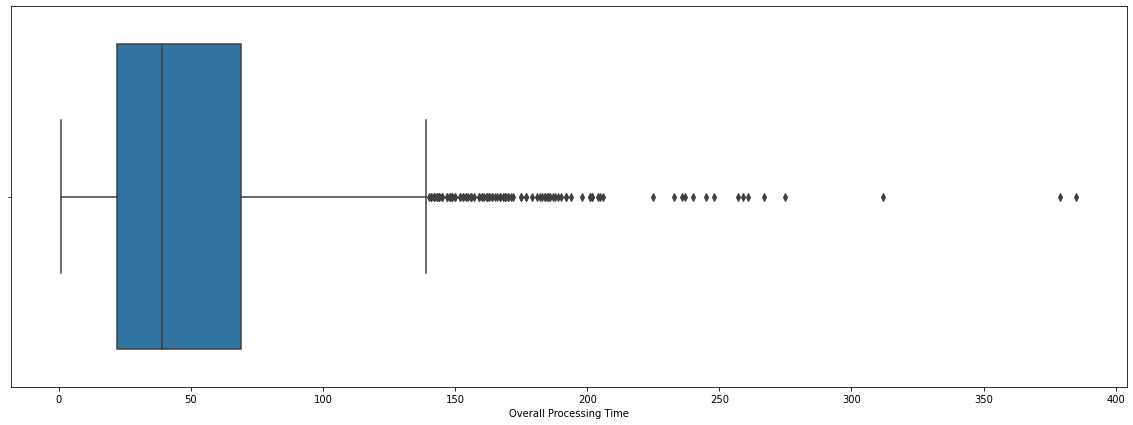

In [20]:
plt.figure(figsize =(20,7))
ax = sns.boxplot(x=df3['Overall Processing Time'])

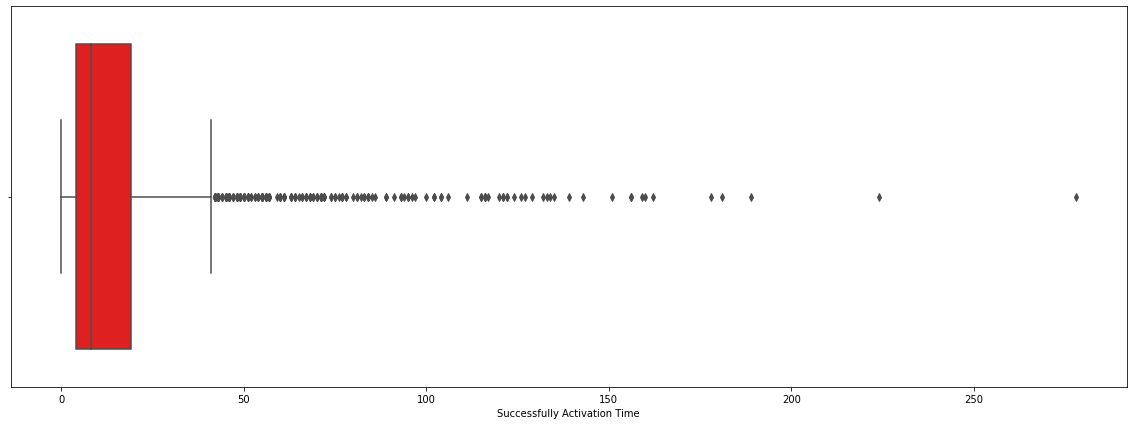

In [21]:
plt.figure(figsize =(20,7))
ax = sns.boxplot(x=df3['Successfully Activation Time'],color='red')

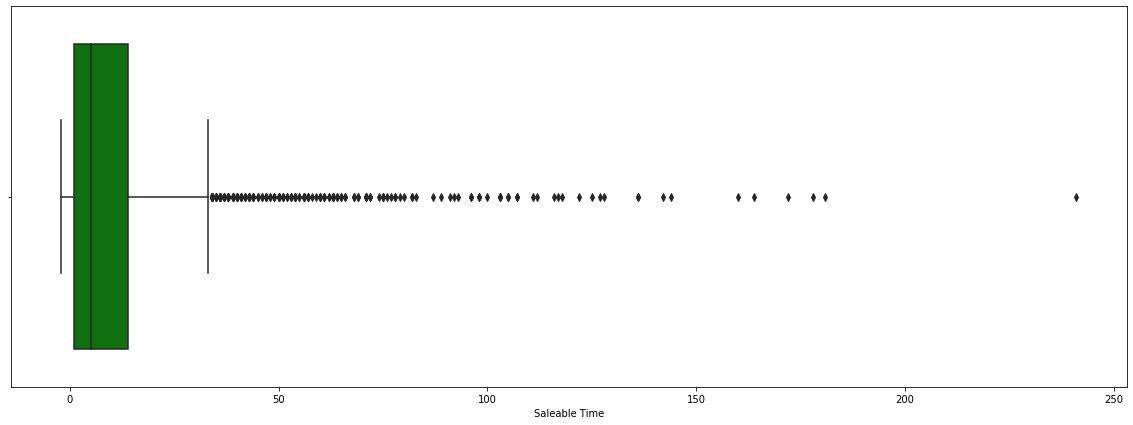

In [22]:
plt.figure(figsize =(20,7))
ax = sns.boxplot(x=df3['Saleable Time'],color='green')

# Vấn đề của Website ABC.vn


- Có thể thấy ngay vấn đề của Website ABC.vn là thời gian trung bình cho toàn bộ quá trình từ lúc khách hàng đăng ký bán hàng đến lúc họ có đơn đầu tiên là rất dài ( trung bình 51 ngày - gần 2 tháng )
- Thời gian trung bình từ lúc khách hàng đăng ký tham gia bán hàng đến lúc được xác nhận trung bình mất đến tận 16 ngày ( hơn 2 tuần). 
- Nhìn vào boxplot có thể thấy outliers rất nhiều,outliers thời gian xác nhận khách hàng đăng ký đều từ ~50 ngày - ~150 ngày, khoảng thời gian quá dài.

Có thể kết luận Website đang vận hành không hiệu quả, khách hàng không được hỗ trợ kịp thời
- Nếu có thêm data về số người rời bỏ/ inactive sẽ có thể kết luận được thêm việc hỗ trợ chậm trễ sẽ đem lại ảnh hưởng lớn thế nào đến công ty

### Nguyên nhân

- Communications giữa nhân viên & khách hàng không tốt/ miss thông tin của nhiều khách hàng dẫn đến tình trạng đến hơn 3 tháng mới xác nhận cho khách
- Không đủ nhân sự support cho số lượng khách hàng đăng ký quá đông. Bộ phận hỗ trợ chưa được training bài bản dẫn đến tốc độ xử lý/ xác nhận đăng ký của khách hàng tốn nhiều thời gian
- Việc mất trung bình 12 ngày (Salable Time) xác nhận khách hàng có thể bán được hàng sau khi họ up thông tin sản phẩm cũng là quá dài. Nguyên nhân có thể do khách hàng up sản phẩm chưa đúng cách, cũng có thể do process của công ty chậm

### Giải pháp

- Gather data khách hàng, lọc ra những khách hàng có sản phẩm lớn, tiềm năng đầu tư nhiều chi phí marketing nhằm allocate nhân sự có chuyên môn cao, kinh nghiệm để hướng dẫn/ tư vấn trực tiếp cho họ. 
- Cam kết nếu khách hàng đăng ký đúng mẫu, đầy đủ thông tin, thời gian xác nhận & approve cho họ phải trong tối đa 5 ngày
- Tương tự như trên, sau khi khách hàng up sản phẩm đúng mẫu, đầy đủ thông tin, phải đảm bảo xác nhận cho họ trong tối đa 5 ngày để khách hàng có thể bán hàng được ngay
- Survey khách hàng về UX/UI Website để tìm hiểu xem họ có gặp khó khăn gì trong việc đăng ký, up thông tin sản phẩm không để optimize từ đó cũng dễ cải thiện thời gian xác nhận đăng ký, xác nhận sản phẩm cho khách hàng.
- Review & update guide hướng dẫn trên nhiều format (pdf guide, video guide, hands on guide ...) giúp khách hàng có thể tiếp cận dễ hơn & dễ hiểu guide hơn